In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [152]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [154]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [155]:
df = pd.get_dummies(df, columns=['Category'], drop_first=True, prefix='is')

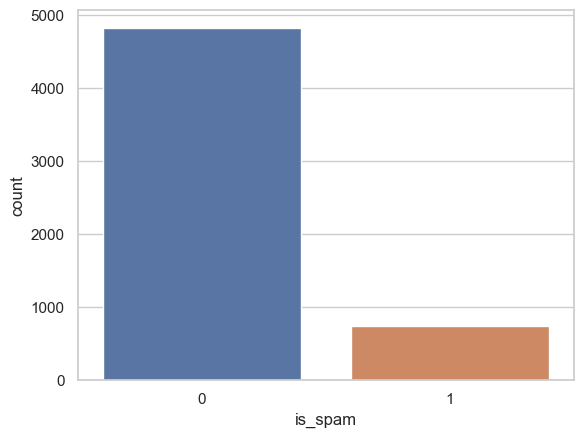

In [156]:
sns.set(style='whitegrid')
sns.countplot(data=df, x='is_spam');

In [158]:
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [159]:
# df['message_clean'] = df['Message'].str.replace(r'[^A-Za-z]', ' ', regex=True)
# df['message_clean'] = df['message_clean'].str.lower()

In [160]:
# df['message_char_count'] = df['message_clean'].str.len()
# df['message_word_count'] = df['message_clean'].str.split().str.len()

In [162]:
def text_preprocessor(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    word_list = word_tokenize(text)
    word_list = [token for token in word_list if token.isalpha() and token not in stopwords.words('english')]
    word_list = [lemmatizer.lemmatize(word) for word in word_list]
    final_text = ' '.join(word_list)
    return final_text

In [163]:
df['message_clean'] = df['Message'].apply(text_preprocessor)

In [164]:
df['message_clean']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message_clean, Length: 5572, dtype: object

# Bag of Words

In [165]:
vectorizer = CountVectorizer()

In [166]:
vectorizer.fit_transform(df['message_clean']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [167]:
pd.DataFrame(vectorizer.fit_transform(df['message_clean']).toarray(), columns=vectorizer.get_feature_names_out())

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Tfidf

In [168]:
tfidf_vectorizer = TfidfVectorizer()

In [169]:
tfidf_vectorizer.fit_transform(df['message_clean']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [170]:
pd.DataFrame(vectorizer.fit_transform(df['message_clean']).toarray(), columns=vectorizer.get_feature_names_out()).add_prefix('Count_')

,Count_aa,Count_aah,Count_aaniye,Count_aaooooright,Count_aathi,Count_ab,Count_abbey,Count_abdomen,Count_abeg,Count_abel,...,Count_zebra,Count_zed,Count_zero,Count_zhong,Count_zindgi,Count_zoe,Count_zogtorius,Count_zoom,Count_zouk,Count_zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
X = df['message_clean'].values
y = df['is_spam'].values

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [174]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [175]:
clf = MultinomialNB()

In [176]:
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [177]:
y_pred = clf.predict(X_test_tfidf)

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



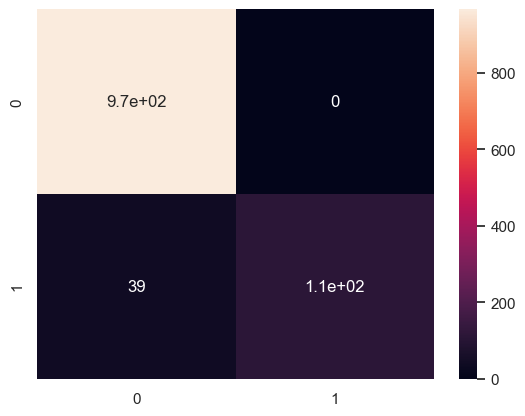

In [179]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [184]:
from sklearn.metrics import roc_curve

In [196]:
y_pred_proba = clf.predict_proba(X_test_tfidf)[:,1]

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

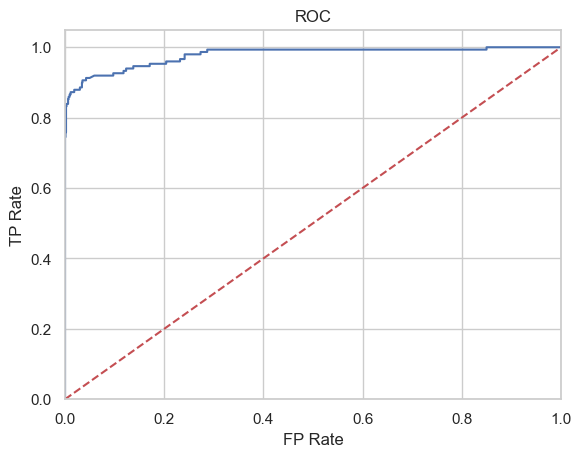

In [203]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()